In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('module6_voiceDataSet.csv')

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
X = df.drop(['label'], axis=1)

In [6]:
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2148,0.186833,0.027472,0.184325,0.173955,0.204731,0.030777,2.655225,10.565846,0.821812,0.159883,0.180645,0.186833,0.172790,0.023495,0.271186,0.178571,0.007812,0.226562,0.218750,0.108929
1124,0.188879,0.060316,0.195537,0.138072,0.242975,0.104904,1.497393,5.037085,0.909425,0.374225,0.140386,0.188879,0.133092,0.050847,0.272727,0.855938,0.023438,8.718750,8.695312,0.098712
170,0.150705,0.087127,0.174299,0.069666,0.226082,0.156416,2.603951,22.328899,0.969287,0.781729,0.050181,0.150705,0.109992,0.017260,0.266667,1.240954,0.007812,5.562500,5.554688,0.332396
3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503
2229,0.205159,0.039543,0.210805,0.186667,0.228908,0.042241,2.099683,7.562209,0.876002,0.271880,0.224885,0.205159,0.154736,0.047105,0.277457,1.578835,0.187500,10.804688,10.617188,0.113644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.223092,0.044697,0.236453,0.226550,0.248391,0.021841,4.960313,34.501778,0.835677,0.117216,0.234961,0.223092,0.125255,0.045326,0.258065,0.410985,0.218750,2.773438,2.554688,0.083457
1032,0.204842,0.058805,0.220699,0.154978,0.257686,0.102707,1.641249,6.265021,0.922661,0.380896,0.268690,0.204842,0.104783,0.047105,0.274286,1.719769,0.140625,9.539062,9.398438,0.073683
2189,0.169863,0.053348,0.174295,0.150336,0.204362,0.054027,2.455869,10.087157,0.908046,0.504679,0.151745,0.169863,0.140055,0.049080,0.279070,1.054142,0.093750,5.906250,5.812500,0.129536
195,0.137313,0.077583,0.152926,0.079740,0.200624,0.120884,1.846050,7.072493,0.946172,0.658351,0.015293,0.137313,0.085122,0.016064,0.202532,1.655692,0.023438,6.078125,6.054688,0.294491


In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train)

StandardScaler()

In [11]:
scaler.transform(X_train)

array([[ 0.59302874,  0.57407237,  0.76449091, ...,  1.28775703,
         1.29601024, -0.60076953],
       [ 1.02864696, -0.8623978 ,  0.6707645 , ...,  0.60529793,
         0.61351461, -0.0586141 ],
       [-1.5697296 ,  0.44212441, -2.10967973, ..., -0.4752623 ,
        -0.46272849, -0.67092623],
       ...,
       [ 0.70268611,  0.3585351 ,  0.98759758, ...,  0.65779479,
         0.66601428, -0.67171574],
       [ 0.01876944,  0.0655535 ,  0.16117858, ..., -0.20184118,
        -0.19366771, -0.92963127],
       [-0.44976218,  0.55134575, -0.39563191, ...,  0.26406839,
         0.2722668 , -0.4235738 ]])

In [12]:
model = LogisticRegression()

In [13]:
model.fit(scaler.transform(X_train), y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(scaler.transform(X_test))

In [15]:
accuracy_score(y_test, y_pred)

0.9726603575184016

In [16]:
accuracy_score(y_pred, y_test)

0.9726603575184016

In [17]:
df = pd.read_csv('module6_voiceDataSet.csv')
X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
model = LogisticRegression()
model.fit(scaler.transform(X_train), y_train)
y_pred = model.predict(scaler.transform(X_test))
accuracy_score(y_test, y_pred)

0.9726603575184016

In [18]:
df = pd.read_csv('module6_voiceDataSet.csv')
X = df.drop(['label'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
model = LogisticRegression()
model.fit(scaler.fit_transform(X_train), y_train)
y_pred = model.predict(scaler.fit_transform(X_test))
accuracy_score(y_test, y_pred)

0.9737118822292324

In [19]:
df = pd.read_csv('module6_glass.csv')

In [20]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [22]:
df['Type'].nunique()

6

In [23]:
X = df.drop(['Type'], axis=1)
y = df['Type']

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf, scoring="accuracy")

array([0.44186047, 0.65116279, 0.3255814 , 0.34883721, 0.07142857])

In [25]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
cvs = cross_val_score(model, X, y, cv=kf, scoring="accuracy")
cvs

array([0.45454545, 0.77272727, 0.59090909, 0.77272727, 0.28571429,
       0.61904762, 0.42857143, 0.14285714, 0.23809524, 0.95238095])

In [27]:
cvs.mean()

0.5257575757575758

In [28]:
df = pd.read_csv('module6_heart_fin1.csv', sep=';')

In [29]:
df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,1.2,0
300,68,1,0,144,193,1,141,0,3.4,0
301,57,1,0,130,131,1,115,1,1.2,0


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.528053,149.646865,0.326733,1.039604,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.525860,22.905161,0.469794,1.161075,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.000000,0.800000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.000000,1.600000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   target    303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [32]:
def IQR_15(column):
    median = column.median()
    return 1.5*(column.quantile(0.75) - column.quantile(0.25)) # 1.5*IQR

In [33]:
for i in df: print(IQR_15(df[i]))

20.25
1.5
3.0
30.0
95.25
1.5
48.75
1.5
2.4000000000000004
1.5


In [34]:
column = df['age']
((column > column.quantile(0.75)+IQR_15(column)) | (column < column.quantile(0.25)-IQR_15(column))) # выкинуть

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: age, Length: 303, dtype: bool

In [35]:
((column < column.quantile(0.75)+IQR_15(column)) & (column > column.quantile(0.25)-IQR_15(column))) # оставить

0      True
1      True
2      True
3      True
4      True
       ... 
298    True
299    True
300    True
301    True
302    True
Name: age, Length: 303, dtype: bool

In [36]:
((column < column.quantile(0.75)+IQR_15(column)) & (column > column.quantile(0.25)-IQR_15(column))).sum()

303

In [37]:
mask = pd.DataFrame()
for i in df:
    column = df[i]
    mask[i] = ((column < column.quantile(0.75)+IQR_15(column)) & (column > column.quantile(0.25)-IQR_15(column)))
res_df = df[mask].dropna()

In [38]:
res_df

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145.0,233.0,0,150.0,0,2.3,1
1,37,1,2,130.0,250.0,1,187.0,0,3.5,1
2,41,0,1,130.0,204.0,0,172.0,0,1.4,1
3,56,1,1,120.0,236.0,1,178.0,0,0.8,1
4,57,0,0,120.0,354.0,1,163.0,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,1,123.0,1,0.2,0
299,45,1,3,110.0,264.0,1,132.0,0,1.2,0
300,68,1,0,144.0,193.0,1,141.0,0,3.4,0
301,57,1,0,130.0,131.0,1,115.0,1,1.2,0


In [39]:
data = df
uno = data.quantile([0.75]).values
dos = data.quantile([0.25]).values
iqr = uno-dos
mask75 = uno + iqr * 1.5
mask25 = dos - iqr * 1.5
gg = data
print(gg[~((gg < mask25) |(gg > mask75)).any(axis=1)].shape[0])

284


In [40]:
gg

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,0.2,0
299,45,1,3,110,264,1,132,0,1.2,0
300,68,1,0,144,193,1,141,0,3.4,0
301,57,1,0,130,131,1,115,1,1.2,0


In [41]:
res_df = (gg[~((gg < mask25) |(gg > mask75)).any(axis=1)])

In [42]:
X = res_df.drop(['target'], axis=1)
y = res_df['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [54]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7674418604651163

In [55]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

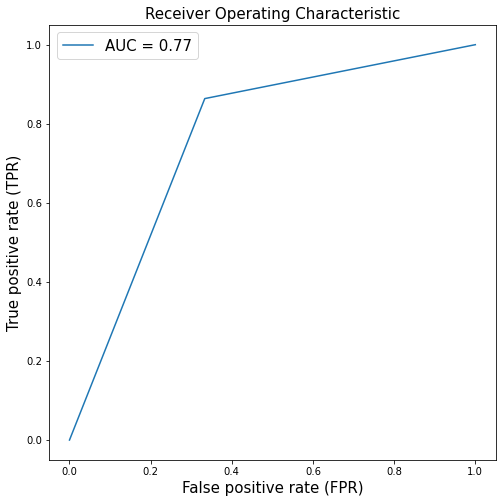

In [56]:
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
calc_and_plot_roc(y_test, y_pred)

In [57]:
y_predict_proba = model.predict_proba(X_test)

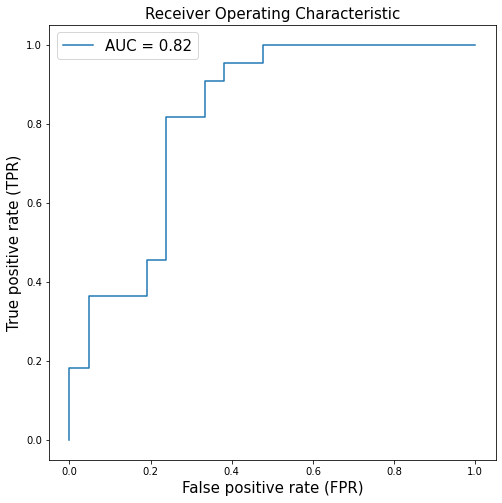

In [58]:
calc_and_plot_roc(y_test, y_predict_proba[:,1])

In [59]:
model=KNeighborsClassifier(n_neighbors=3)

In [60]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.627906976744186

In [61]:
y_predict_proba = model.predict_proba(X_test)

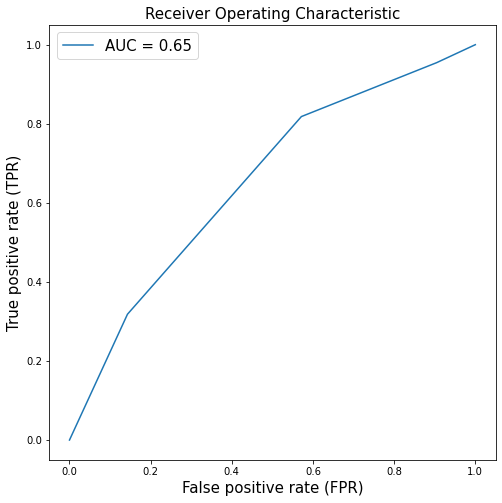

In [62]:
calc_and_plot_roc(y_test, y_predict_proba[:,1])

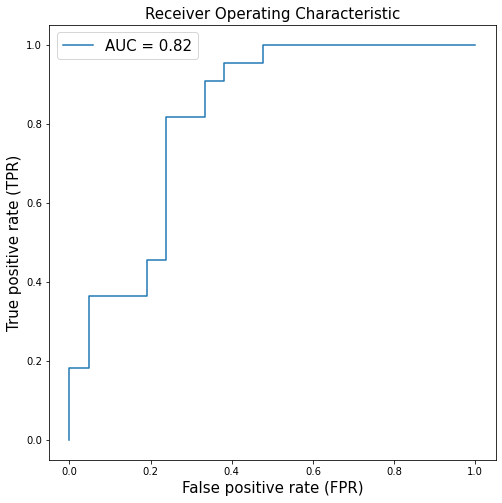

In [65]:
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

X = res_df.drop(['target'], axis=1)
y = res_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict_proba = model.predict_proba(X_test)
calc_and_plot_roc(y_test, y_predict_proba[:,1])